In [21]:
#Relevant imports
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# from xgboost import XGBClassifier
import time
from sklearn import metrics
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import joblib

In [22]:
from xgboost import *

In [3]:
(X_train_full, y_train_full), (X_test_final, y_test_final) = fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

In [4]:
check_rows = 0
counter = 0
    
for img in X_train_full:
    check_rows = 0
    check_rows = 0 if img[0:2].sum() == 0 else 1
    check_rows += 0 if img[26:28].sum() == 0 else 1
    if check_rows == 0:
        counter += 1

print(counter)
print(counter  / 60000)

18799
0.3133166666666667


In [5]:
X_train_full = pd.DataFrame(X_train_full.reshape(60000, 28*28))
X_test_final = pd.DataFrame(X_test_final.reshape(10000, 28*28))

In [6]:
# plt.imshow(X_train_full.loc[0].to_numpy().reshape(28, 28), cmap = 'gray')
# plt.title('Class: {}'.format(y_train_full[0]))
# plt.figure()

In [6]:
missing_vals = pd.DataFrame(X_train_full.isnull().sum(), columns = ['Amount of missing values:'])
missing_vals['Percentage of missing values:']= (missing_vals / len(X_train_full)).round(4) * 100
missing_vals

,Amount of missing values:,Percentage of missing values:
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
779,0,0.0
780,0,0.0
781,0,0.0
782,0,0.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full,
                                                                test_size = 0.1, random_state = 0)

In [9]:
 # duplicates

In [8]:
print("Before removing duplicates: ", X_train.shape)
temp_copy_x = X_train
temp_copy_x['y'] = y_train

temp_copy_x = temp_copy_x.drop_duplicates()

X_train = temp_copy_x.drop(['y'], axis = 1)
y_train = temp_copy_x['y']

print("After removing duplicates: ", X_train.shape)

Before removing duplicates:  (54000, 784)
After removing duplicates:  (54000, 784)


In [10]:
# scaling

In [9]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train= min_max_scaler.transform(X_train)
X_test= min_max_scaler.transform(X_test)

In [12]:
#PCA

In [10]:
pca = PCA(n_components=195)
X_train = pd.DataFrame(pca.fit_transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))
X_test_final = pd.DataFrame(pca.transform(X_test_final))


X_train.shape

(54000, 195)

In [14]:
# pca = PCA().fit(X_train)

# plt.rcParams["figure.figsize"] = (18,6)

# fig, ax = plt.subplots()
# xi = np.arange(1, 785, step=1)
# y = np.cumsum(pca.explained_variance_ratio_)

# plt.ylim(0.0,1.1)
# plt.plot(xi, y, marker='.', linestyle='--', color='b' ,markersize = 1)

# plt.xlabel('Number of Components')
# plt.xticks(np.arange(0, 785, step=30)) #change from 0-based array index to 1-based human-readable label
# plt.ylabel('Cumulative variance (%)')
# plt.title('The number of components needed to explain variance')

# plt.axhline(y=0.95, color='r', linestyle='-')
# plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# ax.grid(axis='x')
# plt.show()

In [15]:
#classifiers

In [ ]:
#dummy

In [25]:
# start_timeDummy = time.time()
# dummyModel = DummyClassifier(strategy="stratified")
# dummyModel.fit(X_train, y_train)
# predictionsDummy = dummyModel.predict(X_test)
# joblib.dump(dummyModel, 'dummyModel.joblib')
# joblib.dump((time.time() - start_timeDummy), 'time_dummyModel.joblib')

# accuracyDummy = metrics.accuracy_score(y_test, predictionsDummy)
# print("Accuracy Dummy: ", accuracyDummy)
# timeDummy = time.time() - start_timeDummy
# print("Time taken to achive result: %s seconds" % (timeDummy))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsDummy, zero_division = 0))
# sns.heatmap(confusion_matrix(y_test, predictionsDummy), cmap = "Blues", annot=True, fmt = '.0f')

['time_dummyModel.joblib']

Accuracy Dummy:  0.10333333333333333
Time taken to achive result: 0.034219980239868164 seconds
              precision    recall  f1-score   support

           0       0.11      0.11      0.11       583
           1       0.11      0.11      0.11       588
           2       0.12      0.11      0.12       633
           3       0.11      0.11      0.11       619
           4       0.10      0.11      0.11       597
           5       0.12      0.11      0.11       632
           6       0.09      0.09      0.09       578
           7       0.09      0.09      0.09       566
           8       0.10      0.10      0.10       580
           9       0.09      0.09      0.09       624

    accuracy                           0.10      6000
   macro avg       0.10      0.10      0.10      6000
weighted avg       0.10      0.10      0.10      6000



<AxesSubplot:>

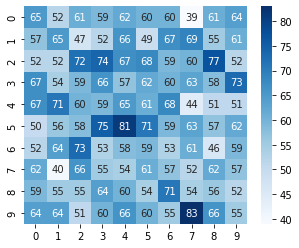

In [26]:
dummyModel = joblib.load('dummyModel.joblib')
timeDummy = joblib.load('time_dummyModel.joblib')

predictionsDummy = dummyModel.predict(X_test)
accuracyDummy = metrics.accuracy_score(y_test, predictionsDummy)
print("Accuracy Dummy: ", accuracyDummy)
print("Time taken to achive result: %s seconds" % (timeDummy))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsDummy, zero_division = 0))
sns.heatmap(confusion_matrix(y_test, predictionsDummy), cmap = "Blues", annot=True, fmt = '.0f')

In [14]:
#logistic

In [28]:
# start_timeLogReg = time.time()
# warnings.filterwarnings('ignore')
# modelLogReg = LogisticRegression(max_iter=500)
# modelLogReg.fit(X_train, y_train)
# predictionsLogReg = modelLogReg.predict(X_test)
# joblib.dump(modelLogReg, 'modelLogReg.joblib')
# joblib.dump((time.time() - start_timeLogReg), 'time_modelLogReg.joblib')

# accuracyLogReg = modelLogReg.score(X_test, y_test)
# print("Accuracy (Logistic Regression): ", accuracyLogReg)
# timeLogReg = time.time() - start_timeLogReg
# print("Time taken to achive result: %s seconds" % (timeLogReg))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsLogReg))
# sns.heatmap(confusion_matrix(y_test, predictionsLogReg), cmap = "Blues", annot=True, fmt = '.0f')

['time_modelLogReg.joblib']

Accuracy (Logistic Regression):  0.8558333333333333
Time taken to achive result: 15.096415996551514 seconds
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       583
           1       0.98      0.96      0.97       588
           2       0.76      0.76      0.76       633
           3       0.85      0.87      0.86       619
           4       0.76      0.79      0.77       597
           5       0.95      0.94      0.94       632
           6       0.63      0.61      0.62       578
           7       0.90      0.93      0.91       566
           8       0.96      0.92      0.94       580
           9       0.95      0.94      0.94       624

    accuracy                           0.86      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.86      0.86      0.86      6000



<AxesSubplot:>

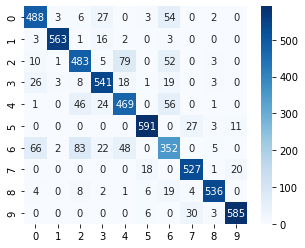

In [29]:
modelLogReg = joblib.load('modelLogReg.joblib')
timeLogReg = joblib.load('time_modelLogReg.joblib')

predictionsLogReg = modelLogReg.predict(X_test)
accuracyLogReg = modelLogReg.score(X_test, y_test)
print("Accuracy (Logistic Regression): ", accuracyLogReg)
print("Time taken to achive result: %s seconds" % (timeLogReg))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsLogReg))
sns.heatmap(confusion_matrix(y_test, predictionsLogReg), cmap = "Blues", annot=True, fmt = '.0f')

In [16]:
#knn

In [30]:
# start_timeKNN = time.time()
# modelKNN = KNeighborsClassifier(n_neighbors = 10, weights='distance')
# modelKNN.fit(X_train, y_train)
# predictionsKNN = modelKNN.predict(X_test)
# joblib.dump(modelKNN, 'modelKNN.joblib')
# joblib.dump((time.time() - start_timeKNN), 'time_modelKNN.joblib')

# accuracyKNN = metrics.accuracy_score(y_test, predictionsKNN)
# print("Accuracy (KNN): ", accuracyKNN)
# timeKNN = time.time() - start_timeKNN
# print("Time taken to achive result: %s seconds" % (timeKNN))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsKNN))
# sns.heatmap(confusion_matrix(y_test, predictionsKNN), cmap = "Blues", annot=True, fmt = '.0f')

['time_modelKNN.joblib']

Accuracy (KNN):  0.8663333333333333
Time taken to achive result: 6.324195861816406 seconds
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       583
           1       0.99      0.95      0.97       588
           2       0.80      0.80      0.80       633
           3       0.90      0.86      0.88       619
           4       0.76      0.78      0.77       597
           5       1.00      0.87      0.93       632
           6       0.65      0.65      0.65       578
           7       0.91      0.96      0.93       566
           8       0.98      0.96      0.97       580
           9       0.90      0.97      0.93       624

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



<AxesSubplot:>

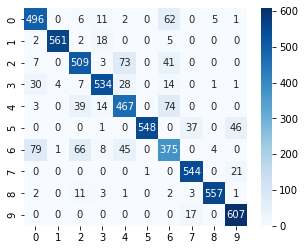

In [31]:
modelKNN = joblib.load('modelKNN.joblib')
timeKNN = joblib.load('time_modelKNN.joblib')

predictionsKNN = modelKNN.predict(X_test)
accuracyKNN = metrics.accuracy_score(y_test, predictionsKNN)
print("Accuracy (KNN): ", accuracyKNN)
print("Time taken to achive result: %s seconds" % (timeKNN))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsKNN))
sns.heatmap(confusion_matrix(y_test, predictionsKNN), cmap = "Blues", annot=True, fmt = '.0f')

In [18]:
#gaussian naive bayes

In [32]:
# start_timeGaussianNB = time.time()
# modelGNB = GaussianNB()
# modelGNB.fit(X_train, y_train)
# predictionsGNB = modelGNB.predict(X_test)
# joblib.dump(modelGNB, 'modelGNB.joblib')
# joblib.dump((time.time() - start_timeGaussianNB), 'time_modelGNB.joblib')

# accuracyGNB = metrics.accuracy_score(y_test, predictionsGNB)
# print("Accuracy (Gaussian Naive Bayes): ", accuracyGNB)
# timeGNB = time.time() - start_timeGaussianNB
# print("Time taken to achive result: %s seconds" % (timeGNB))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsGNB))
# sns.heatmap(confusion_matrix(y_test, predictionsGNB), cmap = "Blues", annot=True, fmt = '.0f')

['time_modelGNB.joblib']

Accuracy (Gaussian Naive Bayes):  0.7361666666666666
Time taken to achive result: 4.538532972335815 seconds
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       583
           1       0.94      0.87      0.90       588
           2       0.73      0.64      0.69       633
           3       0.78      0.71      0.75       619
           4       0.71      0.67      0.69       597
           5       0.77      0.70      0.73       632
           6       0.53      0.48      0.51       578
           7       0.71      0.85      0.77       566
           8       0.58      0.86      0.69       580
           9       0.94      0.85      0.89       624

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.75      0.74      0.74      6000



<AxesSubplot:>

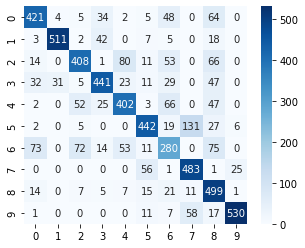

In [33]:
modelGNB = joblib.load('modelGNB.joblib')
timeGNB = joblib.load('time_modelGNB.joblib')

predictionsGNB = modelGNB.predict(X_test)
accuracyGNB = metrics.accuracy_score(y_test, predictionsGNB)
print("Accuracy (Gaussian Naive Bayes): ", accuracyGNB)
timeGNB = time.time() - start_timeGaussianNB
print("Time taken to achive result: %s seconds" % (timeGNB))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsGNB))
sns.heatmap(confusion_matrix(y_test, predictionsGNB), cmap = "Blues", annot=True, fmt = '.0f')

In [20]:
#random forest - basic parameters

In [34]:
# start_timeRandForests = time.time()
# modelRandForests = RandomForestClassifier(n_estimators = 300, n_jobs = -1, random_state = 0)
# modelRandForests.fit(X_train, y_train)
# predictionsRandForests = modelRandForests.predict(X_test)
# joblib.dump(modelRandForests, 'modelRandForests.joblib')
# joblib.dump((time.time() - start_timeRandForests), 'time_modelRandForests.joblib')

# accuracyRandForests = metrics.accuracy_score(y_test, predictionsRandForests)
# print("Accuracy (Random Forests): ", accuracyRandForests)
# timeRandForests = time.time() - start_timeRandForests
# print("Time taken to achive result: %s seconds" % (timeRandForests))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsRandForests))
# sns.heatmap(confusion_matrix(y_test, predictionsRandForests), cmap = "Blues", annot=True, fmt = '.0f')

['time_modelRandForests.joblib']

Accuracy (Random Forests):  0.8716666666666667
Time taken to achive result: 93.044851064682 seconds
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       583
           1       0.99      0.95      0.97       588
           2       0.80      0.82      0.81       633
           3       0.87      0.90      0.88       619
           4       0.77      0.81      0.79       597
           5       0.93      0.93      0.93       632
           6       0.73      0.59      0.65       578
           7       0.93      0.93      0.93       566
           8       0.93      0.96      0.94       580
           9       0.93      0.96      0.94       624

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



<AxesSubplot:>

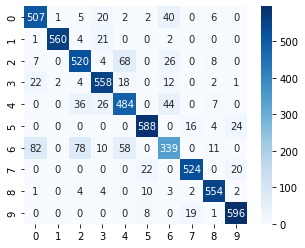

In [36]:
modelRandForests = joblib.load('modelRandForests.joblib')
timeRandForests = joblib.load('time_modelRandForests.joblib')

predictionsRandForests = modelRandForests.predict(X_test)
accuracyRandForests = metrics.accuracy_score(y_test, predictionsRandForests)
print("Accuracy (Random Forests): ", accuracyRandForests)
print("Time taken to achive result: %s seconds" % (timeRandForests))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsRandForests))
sns.heatmap(confusion_matrix(y_test, predictionsRandForests), cmap = "Blues", annot=True, fmt = '.0f')

In [53]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}


In [23]:
#grid search

In [24]:
# First create the base model to tune
# rf = RandomForestClassifier()

# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
# rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1300; total time=36.0min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1500; total time=42.7min
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=13.2min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=27.7min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1300; total time=25.0min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=21.0min
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=8, min_samples_split=15, n_estima

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=15.5min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=1100; total time=18.7min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1500; total time=42.5min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1700; total time=33.5min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1300; total time=24.9min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1500; total time=18.2min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=20.9min
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=15.3min
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1300; total time=36.0min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1500; total time=42.4min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=27.6min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1500; total time=18.1min
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=1100; total time=18.6min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=20.9min
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=15.4min
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1300; total time=36.0min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1700; total time=33.6min
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=13.1min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=27.4min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1500; total time=18.1min
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=1100; total time=18.6min
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1300; total time=36.0min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1500; total time=42.4min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1700; total time=33.6min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1300; total time=24.9min
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=1100; total time=18.5min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=20.9min
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 3.0min
[CV] END bootstrap=False, max_de

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=15.4min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=1100; total time=18.7min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=1100; total time=18.5min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1700; total time=33.7min
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=13.2min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=27.3min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1500; total time=18.1min
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=15.5min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=1100; total time=18.7min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=1100; total time=18.5min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1700; total time=33.9min
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=13.2min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1300; total time=25.0min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1500; total time=18.1min
[CV] END bootstrap=True, max_depth=5

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300, 1500,
                                                         1700, 1900]},
                   random_state=42, verbose=2)

In [39]:
#best params
# joblib.dump(RandomForestClassifier, 'RandomForestClassifier.joblib')
# random_forest_best_params = rf_random.best_params_
# joblib.dump(random_forest_best_params, 'random_forest_best_params.joblib')

In [42]:
RandomForestClassifier = joblib.load('RandomForestClassifier.joblib')
random_forest_best_params = joblib.load('random_forest_best_params.joblib')
random_forest_best_params

{'n_estimators': 1500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [43]:
# start_time_best_RandForests = time.time()
# best_modelRandForests = RandomForestClassifier(n_estimators = 1500, min_samples_split = 2, min_samples_leaf = 2, max_features = 'auto', max_depth = 80, bootstrap = False)
# best_modelRandForests.fit(X_train, y_train)
# best_predictionsRandForests = best_modelRandForests.predict(X_test)
# joblib.dump(best_modelRandForests, 'best_modelRandForests.joblib')
# joblib.dump((time.time() - start_time_best_RandForests), 'time_best_modelRandForests.joblib')

# best_accuracyRandForests = metrics.accuracy_score(y_test, best_predictionsRandForests)
# print("Accuracy (Random Forests): ", best_accuracyRandForests)
# time_best_RandForests = time.time() - start_time_best_RandForests
# print("Time taken to achive result: %s seconds" % (time_best_RandForests))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, best_predictionsRandForests))
# sns.heatmap(confusion_matrix(y_test, best_predictionsRandForests), cmap = "Blues", annot=True, fmt = '.0f')

['time_best_modelRandForests.joblib']

Accuracy (Best Random Forests):  0.8773333333333333
Time taken to achive result: 2092.6486263275146 seconds
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       583
           1       1.00      0.96      0.98       588
           2       0.82      0.83      0.82       633
           3       0.87      0.90      0.88       619
           4       0.77      0.82      0.79       597
           5       0.94      0.94      0.94       632
           6       0.75      0.60      0.66       578
           7       0.93      0.93      0.93       566
           8       0.93      0.96      0.95       580
           9       0.93      0.96      0.94       624

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000



<AxesSubplot:>

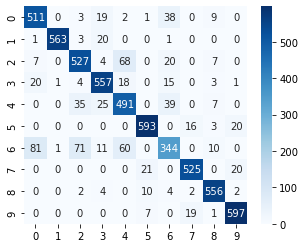

In [44]:
best_modelRandForests = joblib.load('best_modelRandForests.joblib')
time_best_RandForests = joblib.load('time_best_modelRandForests.joblib')

best_predictionsRandForests = best_modelRandForests.predict(X_test)
best_accuracyRandForests = metrics.accuracy_score(y_test, best_predictionsRandForests)
print("Accuracy (Best Random Forests): ", best_accuracyRandForests)
print("Time taken to achive result: %s seconds" % (time_best_RandForests))

plt.figure(figsize=(5,4))
print(classification_report(y_test, best_predictionsRandForests))
sns.heatmap(confusion_matrix(y_test, best_predictionsRandForests), cmap = "Blues", annot=True, fmt = '.0f')

In [26]:
#xgboost

In [45]:
start_timeXGBoost = time.time()
modelXGBoost = XGBClassifier(learning_rate = 0.2, n_estimators = 700, verbosity = 0, use_label_encoder = False,
                             n_jobs = -1, objective = 'multi:softmax')
modelXGBoost.fit(X_train, y_train)
predictionsXGBoost = modelXGBoost.predict(X_test)
joblib.dump(modelXGBoost, 'modelXGBoost.joblib')
joblib.dump((time.time() - start_timeXGBoost), 'time_modelXGBoost.joblib')


# accuracyXGBoost = metrics.accuracy_score(y_test, predictionsXGBoost)
# print("Accuracy (XGBoost): ", accuracyXGBoost)
# timeXGBoost = time.time() - start_timeXGBoost
# print("Time taken to achive result: %s seconds" % (timeXGBoost))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsXGBoost))
# sns.heatmap(confusion_matrix(y_test, predictionsXGBoost), cmap = "Blues", annot=True, fmt = '.0f')

NameError: name 'XGBClassifier' is not defined

In [ ]:
modelXGBoost = joblib.load('modelXGBoost.joblib')
timeXGBoost = joblib.load('time_modelXGBoost.joblib')

predictionsXGBoost = modelXGBoost.predict(X_test)
accuracyXGBoost = metrics.accuracy_score(y_test, predictionsXGBoost)
print("Accuracy (XGBoost): ", accuracyXGBoost)
print("Time taken to achive result: %s seconds" % (timeXGBoost))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsXGBoost))
sns.heatmap(confusion_matrix(y_test, predictionsXGBoost), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
#adaboost

In [46]:
# start_timeAdaBoost = time.time()
# modelAdaBoost = AdaBoostClassifier(modelRandForests, n_estimators = 200, random_state = 0, learning_rate = 0.2)
# modelAdaBoost.fit(X_train, y_train)
# predictionsAdaBoost = modelAdaBoost.predict(X_test)
# joblib.dump(modelAdaBoost, 'modelAdaBoost.joblib')
# joblib.dump((time.time() - start_timeAdaBoost), 'time_modelAdaBoost.joblib')

# accuracyAdaBoost = metrics.accuracy_score(y_test, predictionsAdaBoost)
# print("Accuracy (AdaBoost): ", accuracyAdaBoost)
# timeAdaBoost = time.time() - start_timeAdaBoost
# print("Time taken to achive result: %s seconds" % (timeAdaBoost))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsAdaBoost))
# sns.heatmap(confusion_matrix(y_test, predictionsAdaBoost), cmap = "Blues", annot=True, fmt = '.0f')

['time_modelAdaBoost.joblib']

Accuracy (AdaBoost):  0.8715
Time taken to achive result: 59.1989860534668 seconds
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       583
           1       0.99      0.95      0.97       588
           2       0.81      0.82      0.82       633
           3       0.87      0.89      0.88       619
           4       0.77      0.82      0.79       597
           5       0.93      0.93      0.93       632
           6       0.73      0.59      0.65       578
           7       0.93      0.92      0.93       566
           8       0.94      0.95      0.95       580
           9       0.92      0.96      0.94       624

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



<AxesSubplot:>

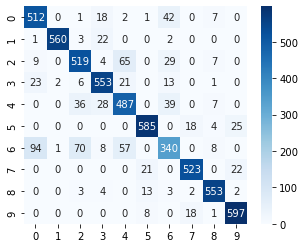

In [47]:
modelAdaBoost = joblib.load('modelAdaBoost.joblib')
timeAdaBoost = joblib.load('time_modelAdaBoost.joblib')

predictionsAdaBoost = modelAdaBoost.predict(X_test)
accuracyAdaBoost = metrics.accuracy_score(y_test, predictionsAdaBoost)
print("Accuracy (AdaBoost): ", accuracyAdaBoost)
print("Time taken to achive result: %s seconds" % (timeAdaBoost))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsAdaBoost))
sns.heatmap(confusion_matrix(y_test, predictionsAdaBoost), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
#voting 

In [54]:
start_timeVoting = time.time()
warnings.filterwarnings('ignore')
modelVoting = VotingClassifier(
    estimators=
        [('KNN', modelKNN),
         ('LogReg', modelLogReg),
         ('RandForests', best_modelRandForests),
         ('AdaBoost', modelAdaBoost)],
    voting='soft', n_jobs=-1, weights=[1, 1, 3, 3])
modelVoting.fit(X_train, y_train)
predictionsVoting = modelVoting.predict(X_test)
joblib.dump(modelVoting, 'modelVoting.joblib')
joblib.dump((time.time() - start_timeVoting), 'time_modelVoting.joblib')

#          ('XGBoost', modelXGBoost)],
         
# accuracyVoting = metrics.accuracy_score(y_test, predictionsVoting)
# print("Accuracy: ", accuracyVoting)
# timeVoting = time.time() - start_timeVoting
# print("Time taken to achive result: %s seconds\n\n" % (timeVoting))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsVoting))
# sns.heatmap(confusion_matrix(y_test, predictionsVoting), cmap = "Blues", annot=True, fmt = '.0f')

/Users/netanel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['time_modelVoting.joblib']

Accuracy:  0.8815
Time taken to achive result: 2069.5006630420685 seconds


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       583
           1       0.99      0.96      0.98       588
           2       0.82      0.82      0.82       633
           3       0.88      0.90      0.89       619
           4       0.77      0.82      0.80       597
           5       0.97      0.94      0.95       632
           6       0.73      0.62      0.67       578
           7       0.93      0.95      0.94       566
           8       0.96      0.96      0.96       580
           9       0.94      0.96      0.95       624

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000



<AxesSubplot:>

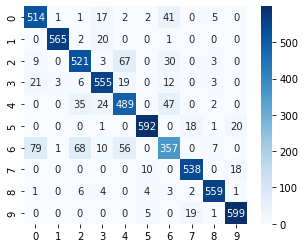

In [56]:
modelVoting = joblib.load('modelVoting.joblib')
timeVoting = joblib.load('time_modelVoting.joblib')

predictionsVoting = modelVoting.predict(X_test)
accuracyVoting = metrics.accuracy_score(y_test, predictionsVoting)
print("Accuracy: ", accuracyVoting)
print("Time taken to achive result: %s seconds\n\n" % (timeVoting))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsVoting))
sns.heatmap(confusion_matrix(y_test, predictionsVoting), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
#stacking

In [60]:
# start_timeStacking = time.time()
# warnings.filterwarnings('ignore')
# modelStacking = StackingClassifier(estimators= [('KNN', modelKNN),
#                                       ('LogReg', modelLogReg),
#                                       ('RandForests', best_modelRandForests),
#                                       ('AdaBoost', modelAdaBoost)],
#                          final_estimator = best_modelRandForests)
# modelStacking.fit(X_train, y_train)
# predictionsStacking = modelStacking.predict(X_test)
# joblib.dump(modelStacking, 'modelStacking.joblib')
# joblib.dump((time.time() - start_timeStacking), 'time_modelStacking.joblib')


# ('XGBoost', modelXGBoost)], 

# accuracyStacking = metrics.accuracy_score(y_test, predictionsStacking)
# print("Accuracy: ", accuracyStacking)
# timeStacking = time.time() - start_timeStacking
# print("Time taken to achive result: %s seconds\n\n" % (timeStacking))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsStacking))
# sns.heatmap(confusion_matrix(y_test, predictionsStacking), cmap = "Blues", annot=True, fmt = '.0f')

['time_modelStacking.joblib']

Accuracy:  0.8943333333333333
Time taken to achive result: 10825.018029212952 seconds


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       583
           1       0.99      0.97      0.98       588
           2       0.82      0.83      0.82       633
           3       0.88      0.92      0.90       619
           4       0.80      0.82      0.81       597
           5       0.96      0.98      0.97       632
           6       0.75      0.67      0.71       578
           7       0.95      0.95      0.95       566
           8       0.97      0.97      0.97       580
           9       0.97      0.95      0.96       624

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



<AxesSubplot:>

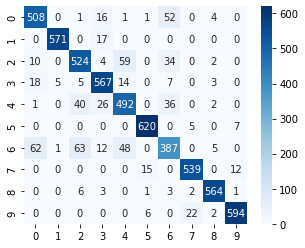

In [61]:
modelStacking = joblib.load('modelStacking.joblib')
timeStacking = joblib.load('time_modelStacking.joblib')

predictionsStacking = modelStacking.predict(X_test)
accuracyStacking = metrics.accuracy_score(y_test, predictionsStacking)
print("Accuracy: ", accuracyStacking)
timeStacking = time.time() - start_timeStacking
print("Time taken to achive result: %s seconds\n\n" % (timeStacking))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsStacking))
sns.heatmap(confusion_matrix(y_test, predictionsStacking), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
#accuraciesGraph

(0.8, 0.91)

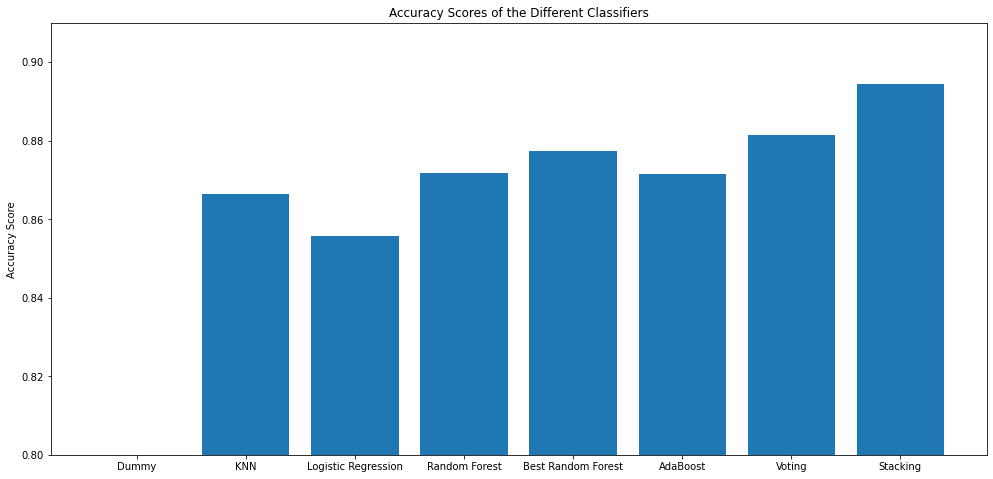

In [75]:
    accuracies = [accuracyDummy, accuracyKNN, accuracyLogReg, accuracyRandForests, best_accuracyRandForests, accuracyAdaBoost, accuracyVoting,  accuracyStacking]
    fig = plt.figure(figsize=(13,6))
    accuraciesSize = np.arange(len(accuracies))
    axes = fig.add_axes([0,0,1,1])
    labels = ['Dummy', 'KNN', 'Logistic Regression', 'Random Forest', 'Best Random Forest', 'AdaBoost', 'Voting',
               'Stacking']
    axes.bar(labels, accuracies)
    axes.set_ylabel("Accuracy Score")
    axes.set_title("Accuracy Scores of the Different Classifiers")
    plt.rcParams['xtick.labelsize'] = 10
    axes.set_ylim([0.8, 0.91])

In [ ]:
#timeGraph

(0.0, 11000.0)

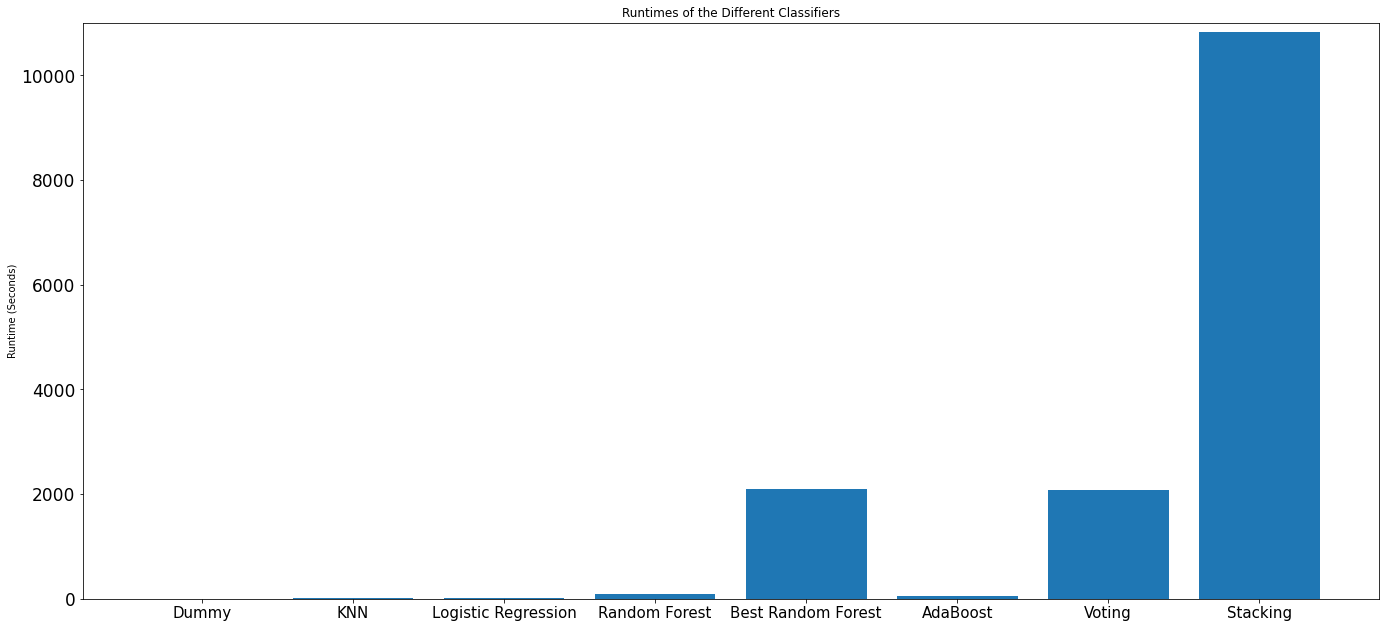

In [106]:
time = [timeDummy, timeKNN, timeLogReg, timeRandForests, time_best_RandForests, timeAdaBoost, timeVoting, timeStacking]
labels = ['Dummy', 'KNN', 'Logistic Regression', 'Random Forest', 'Best Random Forest', 'AdaBoost', 'Voting', 'Stacking']
fig = plt.figure(figsize=(18,8))

timeSize = np.arange(len(time))
axes = fig.add_axes([0,0,1,1])
labels = ['Dummy', 'KNN', 'Logistic Regression', 'Random Forest', 'Best Random Forest', 'AdaBoost', 'Voting', 'Stacking']
axes.bar(labels, time)
axes.set_ylabel("Runtime (Seconds)")
axes.set_title("Runtimes of the Different Classifiers")
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 17
plt.yticks(np.arange(0,12000, 2000))
axes.set_ylim([0, 11000])

In [107]:
results = pd.DataFrame(np.array([['Dummy', accuracyDummy, timeDummy],
                            ['KNN', accuracyKNN, timeKNN],
                            ['Logistic Regression', accuracyLogReg, timeLogReg],
                            ['Random Forests', accuracyRandForests, timeRandForests],
                            ['Best Random Forests', best_accuracyRandForests, time_best_RandForests],
                            ['AdaBoost', accuracyAdaBoost, timeAdaBoost],
                            ['Voting', accuracyVoting, timeVoting],
                            ['Stacking', accuracyStacking, timeStacking]]),
                  columns=['Model', 'Accuracy', 'Runtime (Seconds)'])
# ['XGBoost', accuracyXGBoost, timeXGBoost],
#                             ['Bagging', accuracyBagging, timeBagging],
#                             ['Pasting', accuracyPasting, timePasting],
resultsView = results.sort_values(by = 'Accuracy', axis = 0, ascending = False)
resultsView = resultsView.style.set_properties(**{'text-align': 'left'})
resultsView

,Model,Accuracy,Runtime (Seconds)
7,Stacking,0.8943333333333333,10825.018029212952
6,Voting,0.8815,2069.5006630420685
4,Best Random Forests,0.8773333333333333,2092.6486263275146
3,Random Forests,0.8716666666666667,93.044851064682
5,AdaBoost,0.8715,59.1989860534668
1,KNN,0.8663333333333333,6.324195861816406
2,Logistic Regression,0.8558333333333333,15.096415996551514
0,Dummy,0.10333333333333333,0.034219980239868164


In [ ]:
# start_timeVoting = time.time()
# modelVoting = VotingClassifier(
#     estimators=
#         [('KNN', modelKNN),
#          ('LogReg', modelLogReg),
#          ('RandForests', modelRandForests),
#          ('AdaBoost', modelAdaBoost),
#          ('XGBoost', modelXGBoost)],
#     voting='soft', n_jobs=-1, weights=[1, 1, 3, 3, 3])
# modelVoting.fit(X_train, y_train)
# predictionsVoting = modelVoting.predict(X_test_final)
# accuracyVoting = metrics.accuracy_score(y_test_final, predictionsVoting)
# print("Accuracy: ", accuracyVoting)
# timeVoting = time.time() - start_timeVoting
# print("Time taken to achive result: %s seconds\n\n" % (timeVoting))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test_final, predictionsVoting))
# sns.heatmap(confusion_matrix(y_test_final, predictionsVoting), cmap = "Blues", annot=True, fmt = '.0f')